<a href="https://colab.research.google.com/github/koryakovda/-Python-Data-Science/blob/master/practice_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Линейная регрессия

## Сегодня на практическом занятии:
1. Узнаем, какое количество весов нужно обучать для линейной модели
2. Обучим модель линейной регрессии из sklearn
3. Визуализируем линейную регрессию из sklearn
4. Реализуем свой градиентный спуск для нахождения минимума функции
5. Реализуем свою линейную регрессию с помощью градиентного спуска

In [171]:
#@title Установка нужных версий библиотек
!wget 'https://drive.google.com/uc?export=download&id=1oSFOP0j25OZAuhD8YXxyQXNTdr2lUdtn' -O requirements.txt
!pip install -r requirements.txt

--2023-02-03 01:27:35--  https://drive.google.com/uc?export=download&id=1oSFOP0j25OZAuhD8YXxyQXNTdr2lUdtn
Resolving drive.google.com (drive.google.com)... 142.251.6.102, 142.251.6.139, 142.251.6.100, ...
Connecting to drive.google.com (drive.google.com)|142.251.6.102|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-0g-c0-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/kaploesquak1l1l2a9lb02ia6poah4fj/1675387650000/14904333240138417226/*/1oSFOP0j25OZAuhD8YXxyQXNTdr2lUdtn?e=download&uuid=bed6ec9e-1014-4fe8-8492-ff026648ef2b [following]
--2023-02-03 01:27:35--  https://doc-0g-c0-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/kaploesquak1l1l2a9lb02ia6poah4fj/1675387650000/14904333240138417226/*/1oSFOP0j25OZAuhD8YXxyQXNTdr2lUdtn?e=download&uuid=bed6ec9e-1014-4fe8-8492-ff026648ef2b
Resolving doc-0g-c0-docs.googleusercontent.com (doc-0g-c0-docs.googleusercontent.com)... 173.194.193.132, 2607:f8b

### Получение данных

Будем работать с набором данных для задачи регрессии - данные по предсказанию стоимости недвижимости.

In [172]:
from sklearn.datasets import fetch_california_housing
import pandas as pd
import numpy as np




In [173]:
data = fetch_california_housing()
X = pd.DataFrame(data['data'], columns=data['feature_names'])
y = data['target']
X

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


## 1. Вводная

В этом пункте вспомним, что такое веса в линейной модели.

### 1.1 Сколько будет обучено свободных весов 

Посчитайте, сколько будет создано свободных весов в модели линейная регрессия.

In [174]:
1

1

### 1.2 Сколько будет обучено весов при признаках

Посчитайте, сколько будет создано весов при признаках при обучении линейно модели.

In [175]:
# Ваш код здесь
X.shape[1]

8

### 1.3 Обучите линейную модель для предсказания стоимости

In [176]:

from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X,y)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### 1.4 Посмотрите, сколько весов вышло и сравните с вашими ответами

In [177]:
# Ваш код здесь
model.coef_

array([ 4.36693293e-01,  9.43577803e-03, -1.07322041e-01,  6.45065694e-01,
       -3.97638942e-06, -3.78654265e-03, -4.21314378e-01, -4.34513755e-01])

In [178]:
model.intercept_

-36.94192020718441

## 2. Получение предсказаний линейной модели

В этом пункте вспомним, как получать предсказания линейной моделью.

### 2.1 Получите предсказание для одного объекта через метод модели

In [179]:
# Ваш код здесь
model.predict(X)

array([4.13164983, 3.97660644, 3.67657094, ..., 0.17125141, 0.31910524,
       0.51580363])

### 2.2 Получите предсказание для одного объекта через полученные веса

In [180]:
# Ваш код здесь
np.sum(model.coef_ * X[:1].values) + model.intercept_

4.13164982707675

### 2.3 Посмотрите ошибку MSE на предсказаниях модели

In [181]:
# Ваш код здесь
from sklearn.metrics import mean_squared_error
mean_squared_error(y, model.predict(X))

0.5243209861846072

## 3. Визуализация линейной модели

В этом пункте провизуализируем линейную модель для одного признака.

### 3.1. Возьмите только один первый признак из данных и первые 1000 объектов

Назовите данный датафрейм `small_X`, а истинные значения `small_y`

In [182]:
# Ваш код здесь
small_X = X[['MedInc']].iloc[:1000]
small_y = y[:1000]


### 3.2. Обучите на этих данных линейную модель

In [183]:
# Ваш код здесь
model.fit(small_X,small_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### 3.3. Отобразите на графике обученную линейную регрессию

Добавьте на график точки из обучения в виде точечного графика

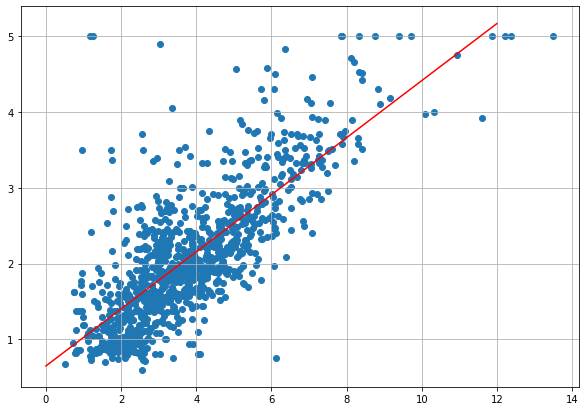

In [184]:
# Ваш код здесь
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))
x = np.arange(0,13)
model_line = model.coef_*x+model.intercept_

plt.plot(x,model_line, '-r')
plt.scatter(small_X,small_y)
plt.grid()


### 3.4 Посмотрите ошибку MSE на предсказаниях модели

In [185]:
# Ваш код здесь
mean_squared_error(small_y,model.predict(small_X))


0.32656055110726806

## 4. Градиентный спуск

В этом пункте реализуем свой градиентный спуск. 

### 4.1. Найдите градиент функции $z = 2x + y^2$



```
# This is formatted as code
```

Ваш градиент здесь
x+2y


### 4.2. Реализуйте функцию для подсчета $z = 0.25 x^2 + 5$

In [186]:
# Ваш код здесь
def z_func(x):
  z = 0.25*x**2+5
  return z

### 4.3. Реализуйте функцию для подсчета градиента $z = 0.25 x^2 + 5$

In [187]:
# Ваш код здесь
def z_func_grad(x):
  z = 0.5*x
  return z

### 4.4. Отрисуйте на графике функцию из пункта 4.2.

<function matplotlib.pyplot.show(*args, **kw)>

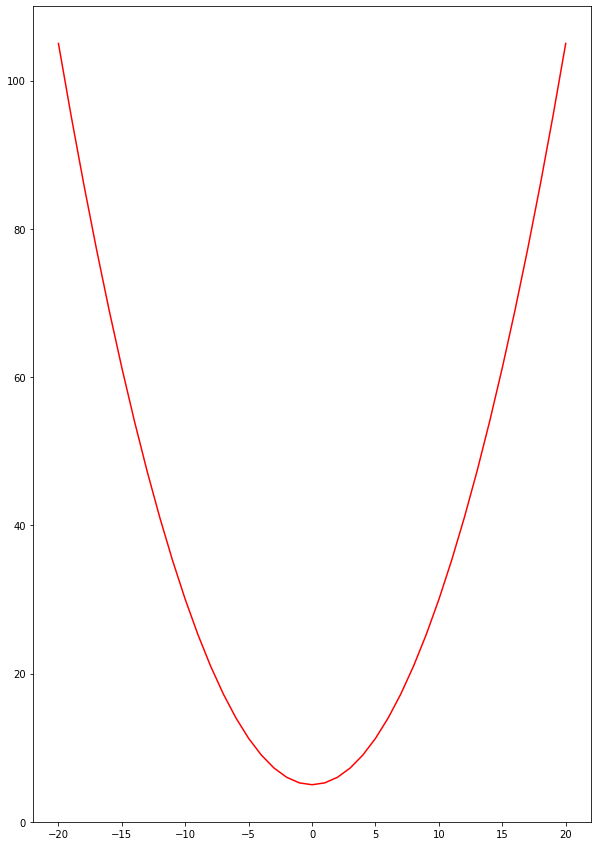

In [188]:
# Ваш код здесь
import matplotlib.pyplot as plt
plt.figure(figsize = (10,15))
x = np.arange(-20,21)
plt.plot(x,z_func(x), '-r')
plt.show

### 4.5. Задайте начальную точку равную -15 и посчитайте в ней градиент

In [189]:
# Ваш код здесь
start_point = -15
grad = z_func_grad(start_point)
grad

-7.5

### 4.5. Сделайте один шаг градиентного спуска и получите следующую точку для подсчета градиента

In [190]:
# Ваш код здесь
lerning_rate = 0.1
curent_point = start_point
next_point = curent_point-grad
next_point


-7.5

### 4.6. Оформите цикл из 10 шагов градиентного спуска

In [191]:
# Ваш код здесь
# ex = 0.1
# diff = 1
start_point = -15
# lerning_rate = 0.1
next_point = start_point
points = []
points.append(next_point)
n=10
for i in range(n):
    current_point=next_point
    next_point = current_point - z_func_grad(current_point)
    points.append(next_point)
    print(points)



[-15, -7.5]
[-15, -7.5, -3.75]
[-15, -7.5, -3.75, -1.875]
[-15, -7.5, -3.75, -1.875, -0.9375]
[-15, -7.5, -3.75, -1.875, -0.9375, -0.46875]
[-15, -7.5, -3.75, -1.875, -0.9375, -0.46875, -0.234375]
[-15, -7.5, -3.75, -1.875, -0.9375, -0.46875, -0.234375, -0.1171875]
[-15, -7.5, -3.75, -1.875, -0.9375, -0.46875, -0.234375, -0.1171875, -0.05859375]
[-15, -7.5, -3.75, -1.875, -0.9375, -0.46875, -0.234375, -0.1171875, -0.05859375, -0.029296875]
[-15, -7.5, -3.75, -1.875, -0.9375, -0.46875, -0.234375, -0.1171875, -0.05859375, -0.029296875, -0.0146484375]


### 4.7. Визуализируйте шаги градиентного спуска на графике

Так же отрисуйте исходную функцию.

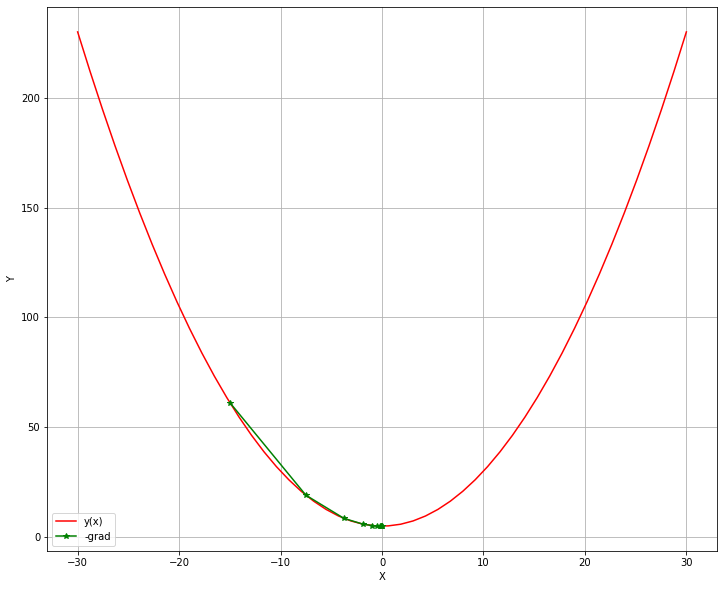

In [192]:
from pandas.core.indexes.datetimelike import Label
# Ваш код здесь
import matplotlib.pyplot as plt
plt.figure(figsize=(12,10))

D= 30
x = np.linspace(-D,+D)
y = 0.25*x**2+5
plt.plot(x,y, '-r', Label = 'y(x)')
X_grad = np.array(points)
plt.plot(X_grad,z_func(X_grad),'-*g', label = '-grad')
plt.grid()
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()


## 5. Многомерная линейная регрессия

В это пункте реализуем свою линейную регрессию для датафрейма small_X

#### 5.1 Реализуйте функцию для подсчета MSE

Функция на вход принимает матрицу `X`, вектор весов `w` и истинные значения `y` 

In [193]:
# Ваш код здесь
def mse(X, w, y):
    pred = X @ w
    return np.mean((y - pred) ** 2)

#### 5.2 Реализуйте функцию для подсчета градиента MSE




Функция на вход принимает матрицу `X`, вектор весов `w` и истинные значения `y`.

In [194]:
# Ваш код здесь
def grad_mse(X,w,y):
  pred = X @ w
  return 2/len(X)*((y-pred)@(-X))


#### 5.3 Инициализируйте веса для признаков

Вспомните и про свободный вес, что нужно сделать с данными, чтобы свободный вес не стоял отдельно.

In [195]:
# Ваш код здесь
small_X ['for intercept'] = 1

small_X. head(3)

,MedInc,for intercept
0,8.3252,1
1,8.3014,1
2,7.2574,1


In [202]:
weights = np.random.randn(small_X.shape[1])
weights

array([-1.11628465, -0.2094976 ])

#### 5.4 Запустить цикл обучения через градиентный спуск для линейной регрессии


In [209]:
#@title Подсказка 1
# Вспомните про шаг обучения, если вам кажется, что он нужен
lerning_rate= 0.1
n = 1000
learning_rate = 0.01
next_weights = weights
for i in range(n):
  current_weights = next_weights
  next_weights = current_weights - lerning_rate*grad_mse(small_X.values,current_weights, small_y)
  if (i%100) == 0:
     print(f"Итерация: {i}")
     print(f"MSE {mse(small_X.values, current_weights, small_y)}")
     print("--------------------------------------------------------")


Итерация: 0
MSE 51.12197836879109
--------------------------------------------------------
Итерация: 100
MSE 2.203711751477199e+90
--------------------------------------------------------
Итерация: 200
MSE 9.569565701156886e+178
--------------------------------------------------------
Итерация: 300
MSE 4.155561073147367e+267
--------------------------------------------------------
Итерация: 400
MSE inf
--------------------------------------------------------
Итерация: 500
MSE inf
--------------------------------------------------------
Итерация: 600
MSE inf
--------------------------------------------------------
Итерация: 700
MSE nan
--------------------------------------------------------
Итерация: 800
MSE nan
--------------------------------------------------------
Итерация: 900
MSE nan
--------------------------------------------------------


<ipython-input-193-671b20fa4ac4>:4: RuntimeWarning: overflow encountered in square
  return np.mean((y - pred) ** 2)
<ipython-input-194-28472012a7fa>:4: RuntimeWarning: overflow encountered in matmul
  return 2/len(X)*((y-pred)@(-X))
<ipython-input-209-3d33b22d0cf8>:9: RuntimeWarning: invalid value encountered in subtract
  next_weights = current_weights - lerning_rate*grad_mse(small_X.values,current_weights, small_y)


In [25]:
#@title Подсказка 2
# Возможно потребуется больше итераций

In [26]:
# Ваш код здесь


#### 5.5 Реализуйте критерий останова по ошибке

Если ошибка с текущей итерации меньше, чем на следующей итерации, то можно выходить из цикла обучения


In [226]:
# Ваш код здесь
n = 10000
learning_rate = 0.01
next_weights = weights
for i in range(n):
  current_weights = next_weights
  next_weights = current_weights - learning_rate*grad_mse(small_X.values,current_weights, small_y)  

  if (i%100) == 0:
     print(f"Итерация: {i}")
     print(f"MSE {mse(small_X.values, current_weights, small_y)}")
     print("--------------------------------------------------------")

  if mse(small_X.values, current_weights, small_y) < mse(small_X.values, next_weights, small_y):
    break


Итерация: 0
MSE 51.12197836879109
--------------------------------------------------------
Итерация: 100
MSE 0.3502963817212215
--------------------------------------------------------
Итерация: 200
MSE 0.33839572937766044
--------------------------------------------------------
Итерация: 300
MSE 0.3324618168758915
--------------------------------------------------------
Итерация: 400
MSE 0.3295030448218787
--------------------------------------------------------
Итерация: 500
MSE 0.3280277396054643
--------------------------------------------------------
Итерация: 600
MSE 0.3272921217741995
--------------------------------------------------------
Итерация: 700
MSE 0.3269253274406243
--------------------------------------------------------
Итерация: 800
MSE 0.326742436165529
--------------------------------------------------------
Итерация: 900
MSE 0.32665124277608937
--------------------------------------------------------
Итерация: 1000
MSE 0.3266057718575168
------------------------

## Резюме 

Сегодня на практическом занятии:
1. Узнали, какое количество весов нужно обучать для линейной модели
2. Обучили модель линейной регрессии из sklearn
3. Визуализировали линейную регрессию из sklearn
4. Реализовали свой градиентный спуск для нахождения минимума функции
5. Реализовали свою линейную регрессию с помощью градиентного спуска

**Муррр** ♥